# GÖZDE KIRBIZ 191180053 HW#2

# Q1

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets
from random import sample
import math
ds=sklearn.datasets.load_iris()
df=pd.DataFrame(ds['data'],columns=ds['feature_names'])
code_species_map=dict(zip(range(3),ds['target_names']))
df['species']=[code_species_map[c] for c in ds['target']]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


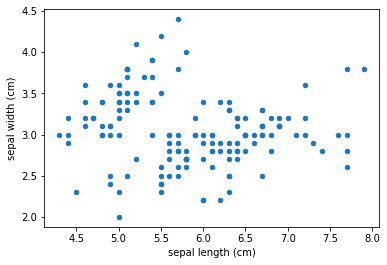

In [2]:
df.plot(kind="scatter",x="sepal length (cm)",y="sepal width (cm)");


# Q2

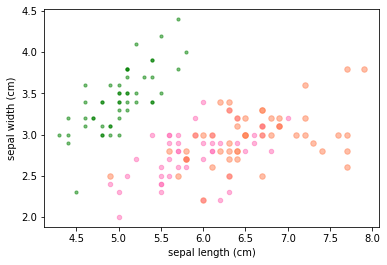

In [3]:
colors=['g','hotpink','coral']
fig,ax=plt.subplots(1,1)
for i, spec in enumerate(df['species'].unique()):
    df_orj=df[df['species']==spec]
    df_orj.plot(kind="scatter",x="sepal length (cm)",y="sepal width (cm)",alpha=0.5,s=10*(i+1),ax=ax,color=colors[i])

In [4]:
df_kmeans = df[["sepal width (cm)","sepal length (cm)"]].copy()

In [5]:
def get_centroids(df_kmeans,K):
    Centroids = (df_kmeans.sample(n=K))
    plt.scatter(df_kmeans["sepal width (cm)"],df_kmeans["sepal length (cm)"],c='black')
    plt.scatter(Centroids["sepal width (cm)"],Centroids["sepal length (cm)"],c='red')
    plt.show()
    return Centroids

In [6]:
def calculate_dist(Centroids,K):
    temp_df=df_kmeans
    i=1
    for index1,row_centroids in Centroids.iterrows():
        ED=[]
        for index2,row_data in temp_df.iterrows():
            d1=(row_centroids["sepal length (cm)"]-row_data["sepal length (cm)"])**2
            d2=(row_centroids["sepal width (cm)"]-row_data["sepal width (cm)"])**2
            d=math.sqrt(d1+d2)
            ED.append(d)
        df_kmeans[i]=ED
        i=i+1

In [7]:
def findmin(K):
    C=[]
    for index,row in df_kmeans.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    df_kmeans["Cluster"]=C

In [8]:
def kmeans(Centroids,K):
    diff=1
    j=0
    while(diff!=0):
        calculate_dist(Centroids,K)
        findmin(K)
        Centroids_new = df_kmeans.groupby(["Cluster"]).mean()[["sepal width (cm)","sepal length (cm)"]]
        if j == 0:
            diff=1
            j=j+1
        else:
            diff = (Centroids_new['sepal width (cm)'] - Centroids['sepal width (cm)']).sum() + (Centroids_new['sepal length (cm)'] - Centroids['sepal length (cm)']).sum()
            print("Difference:",diff)
        Centroids = df_kmeans.groupby(["Cluster"]).mean()[["sepal width (cm)","sepal length (cm)"]]
        visualize(Centroids,K)

In [9]:
def visualize(Centroids,K):
    colors=['g','hotpink','coral']
    for k in range(K):
        data=df_kmeans[df_kmeans["Cluster"]==k+1]
        plt.scatter(data["sepal width (cm)"],data["sepal length (cm)"],color=colors[k])
    plt.scatter(Centroids["sepal width (cm)"],Centroids["sepal length (cm)"],color='black',marker='X')
    plt.show()

# Q3 (get_centroids function is defined above)

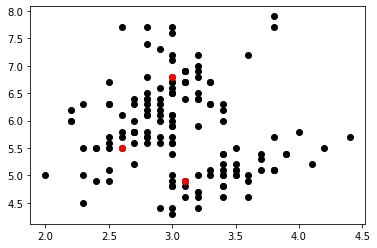

In [10]:
Centroids=get_centroids(df_kmeans,3)

# Q4 (kmeans function is defined above)

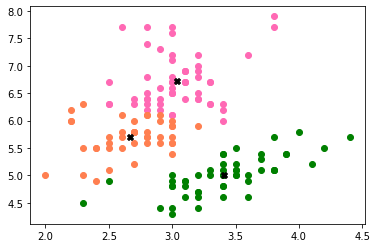

Difference: 0.16672135365774254


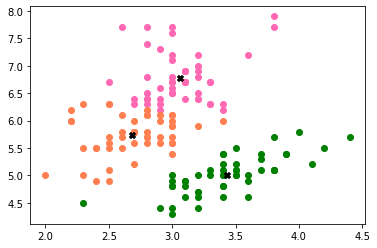

Difference: 0.056679487179487786


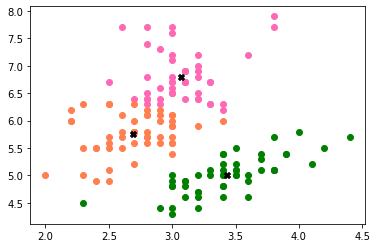

Difference: 0.028592291222760746


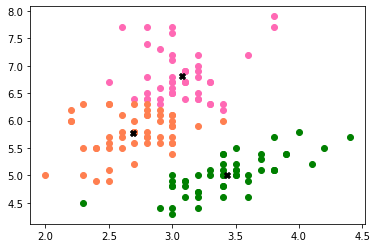

Difference: 0.0


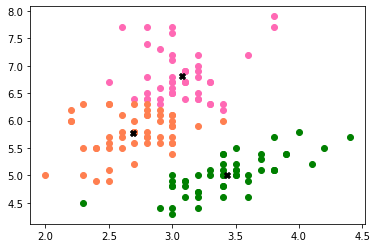

In [11]:
kmeans(Centroids,3)

The centroids has shown with marker X in order to make the algorithm more understandable visually.

# Q5

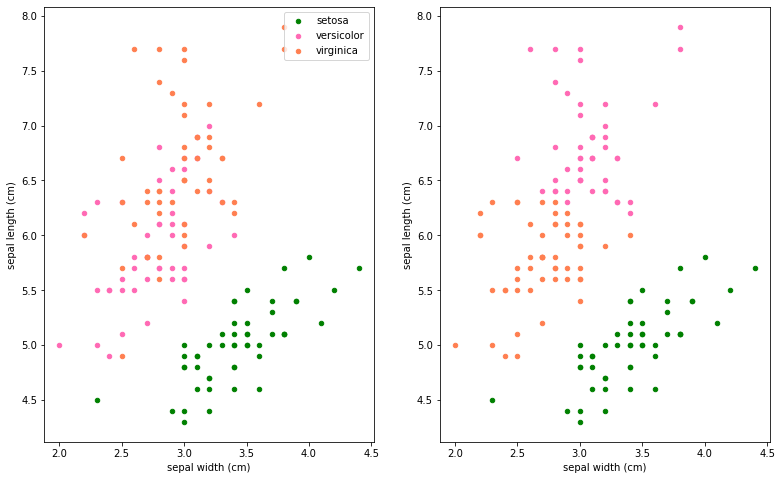

In [12]:
color=['g','hotpink','coral']
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,8))
for i,spec in enumerate(df['species'].unique()):
    df_orj=df[df['species']==spec]
    df_orj.plot(kind="scatter",x="sepal width (cm)",y="sepal length (cm)",ax=ax1,color=color[i],label=spec)
ax1.legend()
for k in range(3):
        data=df_kmeans[df_kmeans["Cluster"]==k+1]
        data.plot(kind="scatter",x="sepal width (cm)",y="sepal length (cm)",color=color[k],ax=ax2)
plt.show()

With original dataset scatter plot, virginica and versicolor were not clearly seperated from each other. Some virginica values were intertwined with versicolor. After applying K-Means, since we iterate our K-means algorithm when difference equals to zero, the types of flowers are completely seperated from each other visually. However, if we compare K-Means result to the original data, we can see that some virginica values considered as versicolor and some versicolor values considered as virginica. Even though K-Means result is slightly off, the algorithm starts with no supervised conditions. Considering this, K-Means did a pretty good job grouping the type of Iris.

PS: Since centroid points are initialized randomly, K-Means plot's colors may not show the corresponding labels in the original plot.